In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from numpy import random
from numpy import array
import pandas as pd
import uproot as up
import os
from math import log
import matplotlib as mpl


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # Normalized data to range from (0,1)
from sklearn.metrics import (
    precision_recall_curve,
    plot_precision_recall_curve,
    average_precision_score,
    roc_curve,
    auc,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    classification_report
)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from datetime import datetime
import time

In [2]:
def masking(d):
    mask = (
    (d["met_Et"] > 200)
    & (d["nLep_signal"] == 2)
    & (d["lep1Flavor"] == d["lep2Flavor"])
    & (d["lep1Charge"] == -1 * d["lep2Charge"])
    & (d["nLep_base"] == 2)
    & (d["met_Et"] / d["METOverJ1pT"] > 100)
    & (d["DPhiJ1Met"] > 2.0)
    & (d["nJet30"] < 3)
    & (d["nJet30"] > 0)
    & (d["minDPhiAllJetsMet"] > 0.4)
    & (d["nBJet20"] == 0)
    & (d["lep1Pt"] > 10)
    & (d["lep2Pt"] > 10)
    & (d["Rll"] > 0.75)
    & (d["mt_lep1"] > 10)
    & (d["mt_lep2"] > 10)
    )
    
    return mask


In [3]:
def Zpoisson(s, b):
    var = 0.3*b
    n = s + b
    f1 = (n*(b+var**2))/(b**2+n*var**2)
    f2 = (var**2*(n-b))/(b*(b+var**2))
    
    Z = (2*(n*log(f1) - (b/var)**2*log(1+f2)))**0.5
    
    try:
        return Z
    except ValueError:
        return 0
        

In [4]:
def Event_Organization(Input_Trees):
    tree_branches = Input_Trees
    lep1Flavor = []
    lep1Charge = []
    lep1Pt = []
    lep1Eta = []
    lep1MT_Met = []
    lep1Phi = []
    lep1_DPhiMet = []
    lep2Flavor = []
    lep2Charge = []
    lep2Pt = []
    lep2Eta = []
    lep2MT_Met = []
    lep2Phi = []
    lep2_DPhiMet = []
    met_Et = []
    met_Phi = []
    Rll = []
    nJet30 = []
    eventWeight = []
    genWeight = []
    pileupWeight = []
    leptonWeight = []
    bTagWeight = []
    jvtWeight = []
    mt2leplsp_100 = []
    nLep_signal = []
    nLep_base = []
    METOverJ1pT = []
    DPhiJ1Met = []
    minDPhiAllJetsMet = []
    nBJet20 = []
    mt_lep1 = []
    mt_lep2 = []
    mll = []
    
    for element in tree_branches['lep1Flavor']:
        lep1Flavor.append(element)
    for element in tree_branches['lep1Charge']:
        lep1Charge.append(element)
    for element in tree_branches['lep1Pt']:
        lep1Pt.append(element)
    for element in tree_branches['lep1Eta']:
        lep1Eta.append(element)
    for element in tree_branches['lep1MT_Met']:
        lep1MT_Met.append(element)
    for element in tree_branches['lep1Phi']:
        lep1Phi.append(element)
    for element in tree_branches['lep1_DPhiMet']:
        lep1_DPhiMet.append(element)
    for element in tree_branches['lep2Flavor']:
        lep2Flavor.append(element)
    for element in tree_branches['lep2Charge']:
        lep2Charge.append(element)
    for element in tree_branches['lep2Pt']:
        lep2Pt.append(element)
    for element in tree_branches['lep2Eta']:
        lep2Eta.append(element)
    for element in tree_branches['lep2MT_Met']:
        lep2MT_Met.append(element)
    for element in tree_branches['lep2Phi']:
        lep2Phi.append(element)
    for element in tree_branches['lep2_DPhiMet']:
        lep2_DPhiMet.append(element)
    for element in tree_branches['met_Et']:
        met_Et.append(element)
    for element in tree_branches['met_Phi']:
        met_Phi.append(element)
    for element in tree_branches['Rll']:
        Rll.append(element)
    for element in tree_branches['nJet30']:
        nJet30.append(element)
    for element in tree_branches['eventWeight']:
        eventWeight.append(element)
    for element in tree_branches['genWeight']:
        genWeight.append(element)
    for element in tree_branches['pileupWeight']:
        pileupWeight.append(element)
    for element in tree_branches['leptonWeight']:
        leptonWeight.append(element)
    for element in tree_branches['bTagWeight']:
        bTagWeight.append(element)
    for element in tree_branches['jvtWeight']:
        jvtWeight.append(element)
    for element in tree_branches['mt2leplsp_100']:
        mt2leplsp_100.append(element)
    for element in tree_branches['nLep_signal']:
        nLep_signal.append(element)
    for element in tree_branches['nLep_base']:
        nLep_base.append(element)
    for element in tree_branches['METOverJ1pT']:
        METOverJ1pT.append(element)
    for element in tree_branches['DPhiJ1Met']:
        DPhiJ1Met.append(element)
    for element in tree_branches['nBJet20']:
        nBJet20.append(element)
    for element in tree_branches['mt_lep1']:
        mt_lep1.append(element)
    for element in tree_branches['mt_lep2']:
        mt_lep2.append(element)
    for element in tree_branches['minDPhiAllJetsMet']:
        minDPhiAllJetsMet.append(element)
    for element in tree_branches['mll']:
        mll.append(element)
        
            
    Output = {'lep1Flavor':lep1Flavor,
    'lep1Charge':lep1Charge,
    'lep1Pt':lep1Pt,
    'lep1Eta':lep1Eta,
    'lep1MT_Met':lep1MT_Met,
    'lep1Phi':lep1Phi,
    'lep1_DPhiMet':lep1_DPhiMet,
    'lep2Flavor':lep2Flavor,
    'lep2Charge':lep2Charge,
    'lep2Pt':lep2Pt,
    'lep2Eta':lep2Eta,
    'lep2MT_Met':lep2MT_Met,
    'lep2Phi':lep2Phi,
    'lep2_DPhiMet':lep2_DPhiMet,
    'met_Et':met_Et,
    'met_Phi':met_Phi,
    'Rll':Rll,
    'nJet30':nJet30,
    'eventWeight':eventWeight,
    'genWeight':genWeight,
    'pileupWeight':pileupWeight,
    'leptonWeight':leptonWeight,
    'bTagWeight':bTagWeight,
    'jvtWeight':jvtWeight,
    'mt2leplsp_100':mt2leplsp_100,
    'nLep_signal':nLep_signal,
    'nLep_base':nLep_base,
    'METOverJ1pT':METOverJ1pT,
    'DPhiJ1Met':DPhiJ1Met,
    'nBJet20':nBJet20,
    'mt_lep1':mt_lep1,
    'mt_lep2':mt_lep2,
    'minDPhiAllJetsMet':minDPhiAllJetsMet,
    'mll':mll}
        
    return(Output)

In [36]:
def build_model(network,RATE):

    # Create a NN model. Barebones model with no layers.
    model = Sequential()

    # Best option for most NN.
    opt = keras.optimizers.Adam(lr=0.001)

    # Activation function other options possible.
    act = "relu"  # Relu is 0 for negative values, linear for nonzero values.

    # Use model.add() to add one layer at a time, 1st layer needs input shape, So we pass the 1st element of network.
    # Dense Layers are fully connected and most common.

    model.add(Dense(numBranches, input_shape=(numBranches,), activation=act))

    # Loop through and add layers (0,(n-2)) where n is the number of layers. We end at n-2 because we start at 1 not zero and
    # the input layer is added above with input dimension. Therefore we must remove 2 from layers.
    for i in range(0,len(network)-1):
        model.add(Dense(network[i], activation=act))# Hidden layers.
    # Turning off nuerons of layer above in loop with probability = 1-r, so r = 0.25, then 75% of nerouns are kept.
        model.add(Dropout(RATE, seed=seed))

    # Last layer needs to have one neuron for a binary classification(BC) which yields from 0 to 1.
    model.add(
        Dense(network[len(network)-1], activation="sigmoid")
    )  # Output layer's activation function for BC needs to be sigmoid.

    # Last step is compiling.
    model.compile(
        loss="binary_crossentropy",
        optimizer=opt,
        metrics=tf.keras.metrics.Precision(),
    )
    return model

In [6]:
# def build_classification(feats,Y):
    
#     outlabels = LabelEncoder()
#     outlabels.fit(Y)
#     sidentifier = outlabels.transform(Y)
#     sidentifier = np_utils.to_categorical(sidentifier)
#     oshap = len(np.unique(Y))
    
#     model = Sequential()
#     model.add(Dense(feats, input_dim = feats, activation = "relu"))
#     model.add(Dense(feats, activation = 'relu'))
        
    
#     model.add(Dense(oshap, activation='softmax'))
    
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = tf.keras.metrics.Precision())
    
#     return model

In [7]:
def runNN(LAYER, BATCH, RATE, xtrain, ytrain, xtest, ytest,onodes=1,labels='None'):
    """
    NN structure ex. [5,5,5,5,1] 4 layers with 5 neurons each and one output layer. LAYER value is
    the number of hidden layers excluding the output layer. Each hidden layer will contain the same
    amount of neurons (It is hard coded to be the number of features). The BATCH is the batch size,
    powers of 2 are perfered but any positive number works. RATE is the drop out rate; so a RATE = .5
    is half of the neurons being randomly turned off.
    """
    network = []
    numEpochs = 80  # Number of times the NN gets trained.
    batchSize = BATCH
    numLayers = LAYER
    neurons = numBranches
    
    i = 0

    # This creates a list that has the structure of the NN.
    for i in range(numLayers):
        network.append(neurons)
    network.append(1)
    numNeurons = sum(network)

    # This is a conformation that the script is starting and the NN structure is displayed.
    print("Script starting....\n", network)

    
    sufix = ".CPU"
    print("CPU")

    # Start time for file name.
    startTime = datetime.now()
    pre = time.strftime("%Y.%m.%d_") + time.strftime("%H.%M.%S.")

    # Filename for keras model to be saved as.
    h5name = (
        "numLayers"
        + str(LAYER)
        + ".numBr anches"
        + str(neurons)
        + ".batchSize"
        + str(BATCH)
    )
    
    #determines user path to generate a model
    
    path = os.getcwd()
    
    modelName = path + '/' + pre + h5name + sufix + ".h5"

    # Filename for plots to be identified by saved model.
    figname = path + '/' + pre + ".plots"

    # Using model and setting parameters.
    if onodes==1:
        model = build_model(network,RATE)
    elif onodes==4:
        model = build_classification(network[0],labels)

    
    model.save(modelName)

    # This checkpoint is used for recovery of trained weights incase of interuption.
    checkPointsCallBack = ModelCheckpoint("temp.h5", save_best_only=True)

    # This terminates early if the monitor does not see an improvement after a certain
    # amount of epochs given by the patience.
    earlyStopCallBack = EarlyStopping(
        monitor="val_loss", patience=30, restore_best_weights=True
    )
        

    # This is where the training starts.
    kModel = model.fit(
        xtrain,
        ytrain,
        epochs=numEpochs,
        batch_size=batchSize,
        validation_data=(xtest, ytest),
        verbose=1,
        callbacks=[earlyStopCallBack, checkPointsCallBack]
    )
    
    return model,kModel,startTime,modelName

In [8]:
def checkTraining(model,kModel):
    # This is the predicted score. Values range between [0,1]
    y_predicted = model.predict(X_test)

    # Prediction, fpr,tpr and threshold values for ROC.
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
    aucroc = auc(fpr, tpr)
    precision, recall, thresRecall = precision_recall_curve(y_test, y_predicted)
    
    figure, axs = plt.subplots(2, figsize=(6,10))
    axs[0].set_xlabel("Score")
    axs[0].set_ylabel("Distribution")
    axs[0].legend(loc="upper right")
    axs[0].plot(fpr, tpr, "r-", label="ROC (area = %0.6f)" % (aucroc))
    axs[0].plot([0, 1], [0, 1], "--", color=(0.6, 0.6, 0.6), label="Luck")
    axs[0].set_xlim([-0.05, 1.05])
    axs[0].set_ylim([-0.05, 1.05])
    axs[0].set_xlabel("False Positive Rate")
    axs[0].set_ylabel("True Positive Rate")
    axs[0].set_title("Receiver operating characteristic")
    axs[0].legend(loc="lower right")
    axs[0].grid(True)
    


    # AUC
    #plotROC(fpr, tpr, aucroc)

    axs[1].plot(thresRecall, precision[:-1], "b--", label="Precision")
    axs[1].plot(thresRecall, recall[:-1], "g-", label="Recall")
    axs[1].plot(recall, precision, 'r-.', label='PvR')
    axs[1].set_ylim([0.00, 1.05])
    axs[1].set_xlabel("Threshold")
    axs[1].set_title("Precision/Recall vs. Threshold Curve")
    axs[1].legend(loc="lower right")
    axs[1].grid(True)

    compare_train_test(X_train, y_train, X_test, y_test)
    
    return aucroc

In [9]:
def compare_train_test(X_train, y_train, X_test, y_test, bins=100):
    """
    This creates the signal and background distrubution.
    """
    i = 0
    j = 0
    sig_index = []
    bkg_index = []
    decisions = []
        
    for X, y in ((X_train, y_train), (X_test, y_test)):
        # captures indices in X_train and X_test dataframes that correlate to signal and background events
#         while i < len(y):
#             if y[i] == 1.:
#                 sig_index.append(j)
#             elif y[i] == 0.:
#                 bkg_index.append(j)
#             i += 1
#             j += 1
#         i = 0
        d1 = model.predict(X[y > 0.5]).ravel()  # signal
        d2 = model.predict(X[y < 0.5]).ravel()  # background
        decisions += [d1, d2]
                
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = array([low, high])
    
    
    
    train_s = decisions[0]
    train_b = decisions[1]
    test_s = decisions[2]
    test_b = decisions[3]
    
        
    
    #Combining scores for test and training sets of signal and background seperately
    S_scores = np.concatenate((train_s, test_s), axis=None)
    B_scores = np.concatenate((train_b, test_b), axis=None)
    max_s = S_scores.max()    
    

    #Scoring histograms for training sets
    
    figure2, axes = plt.subplots(2, figsize=(16,20))
    axes[0].hist(
        train_s,
        color="r",
        alpha=0.5,
        range=low_high,
        bins=bins,
        histtype="stepfilled",
        density=True,
        label="S (train)",
    )
    
    axes[0].hist(
        train_b,
        color="b",
        alpha=0.5,
        range=low_high,
        bins=bins,
        histtype="stepfilled",
        density=True,
        label="B (train)",
    )
    
    #Scoring points for testing sets

    histS, bins = np.histogram(test_s, bins=bins, range=low_high, density=True)
    scale = len(test_s) / sum(histS)
    err = np.sqrt(histS * scale) / scale

    center = (bins[:-1] + bins[1:]) / 2
    axes[0].errorbar(center, histS, yerr=err, fmt="o", c="r", label="S (test)")

    histB, bins = np.histogram(test_b, bins=bins, range=low_high, density=True)
    scale = len(test_b) / sum(histB)
    
    histS2, bins = (np.histogram(S_scores, bins=bins, range=low_high, density=True))
    histB2, bins = (np.histogram(B_scores, bins=bins, range=low_high, density=True))
        
    err = np.sqrt(histB * scale) / scale
    axes[0].set_title("Net Learning Feedback")
    axes[0].errorbar(center, histB, yerr=err, fmt="o", c="b", label="B (test)")
    axes[0].legend(loc='upper right')
    axes[0].set_xlim(0,1)

In [10]:
def get_proper_weight(data):
    
    propweight = []
        
    for val in data.index:
        propweight.append(data['eventWeight'][val]*data['genWeight'][val]*data['pileupWeight'][val]*
                          data['leptonWeight'][val]*data['bTagWeight'][val]*data['jvtWeight'][val]*139000)
    
    return propweight




In [11]:
def outputs(data, weights):
    pweight = get_proper_weight(weights)
    bins=100
    datasc = sc.transform(data)

    prediction = model.predict(datasc).ravel()
    
    hist, binfo = np.histogram(prediction, bins=bins, weights=pweight)
          
    return(hist, prediction, pweight)



In [12]:
def thresh_scoring(slep, dibo, plotS, plotB, weights, weightb, Title, i, plotting):
    print(Title)
    signifs = []
    tscores = []
    thresh = 99
    step = 1
    while thresh > 90:
        focus = thresh-step
        Z = Zpoisson(sum(slep[focus:99]), sum(dibo[focus:99]))
        signifs.append(Z)
        thresh = focus
    print('Best Score', max(signifs))
    best_score = 99 - signifs.index(max(signifs))
    tscores.append(best_score)
    if plotting==True:
        ax[i].hist(plotS, color='r', alpha=0.5, bins=100, histtype='stepfilled', label='Slepton Scores',weights=weights)
        ax[i].hist(plotB, color='b', alpha=0.5, bins=100, histtype='stepfilled', label='Diboson Scores',weights=weightb)
        ax[i].set_title(Title)
        ax[i].set_xlim(0,1)
        ax[i].vlines(best_score/100, 0, max(slep)+5, color='g',label='threshold')
        ax[i].legend(loc='upper right')
        ax[i].set_yscale('log')
    
    sumS = sum(slep[best_score-1:99])
    sumB = sum(dibo[best_score-1:99])

    
    thresh = 93
    sscores = sum(slep[thresh:99])
    bscores = sum(dibo[thresh:99])
    
    Signif99 = Zpoisson(sscores, bscores)
    
    statsdf = pd.DataFrame({'Slepton Mass':Title[0], 'DM Mass':Title[1], 'Signal Sum':sumS, 'Background Sum':sumB, 
                            'Significance':max(signifs),
                           'Signal Sum 0.94':sscores, 'Background Sum 0.94':bscores, 'Significance 0.94':Signif99, 
                           'Thresh Score':tscores}, index=[0])
    return statsdf
        

# Model Set-Ups

### Individual Slepton Files

In [13]:
bkgline = '/home/jupyter-zdethlof/SlepWrk/SusySkimSlep_v0.2_diboson2L.root'

bkgd = up.open(bkgline)['diboson2L_NoSys;1']

pb = bkgd.arrays()

maskb = masking(pb)

select_bkg = pb[maskb]
dibotrees = Event_Organization(select_bkg)
bkg_num = len(dibotrees['jvtWeight'])
dibodf = pd.DataFrame(dibotrees)

In [24]:
sigline = '/home/jupyter-zdethlof/SlepWrk/SusySkimSlep_v0.2_SlepSignals.root'

sigd = up.open(sigline)['MGPy8EG_A14N23LO_SlepSlep_dir_2L2MET75_200p0_170p0_NoSys;1']

ps = sigd.arrays()

masks = masking(ps)

select_sig = ps[masks]

sleptons = Event_Organization(select_sig)

sleptree = pd.DataFrame(sleptons)

In [14]:
sigline = '/home/jupyter-zdethlof/SlepWrk/SusySkimSlep_v0.2_SlepSignals.root'
test_files = ['MGPy8EG_A14N23LO_SlepSlep_dir_2L2MET75_200p0_140p0_NoSys;1',
              'MGPy8EG_A14N23LO_SlepSlep_dir_2L2MET75_200p0_170p0_NoSys;1']

sleptree = pd.DataFrame([])


for file in test_files:
    sigd = up.open(sigline)[file]
    ps = sigd.arrays()
    masks = masking(ps)
    select_sig = ps[masks]
    temp = Event_Organization(select_sig)
    tempdf = pd.DataFrame(temp)
    sleptree = pd.concat([sleptree,tempdf], ignore_index=True)
    
print(len(sleptree))

390849


In [44]:
sigline = '/home/jupyter-zdethlof/SlepWrk/SusySkimSlep_v0.2_SlepSignals.root'

sigd = up.open(sigline)['MGPy8EG_A14N23LO_SlepSlep_dir_2L2MET75_200p0_140p0_NoSys;1']

ps = sigd.arrays()

masks = masking(ps)

select_sig = ps[masks]

temp = Event_Organization(select_sig)

sleptree = pd.DataFrame(temp)

In [45]:
seed = random.randint(100)
sleptree = sleptree.sample(frac=1)

slep_len = len(sleptree['jvtWeight'])
fullset = pd.concat([sleptree[:bkg_num], dibodf], ignore_index=True)
ind = np.arange(0,len(fullset))
fullset.index = ind


y = np.concatenate((np.ones(bkg_num), np.zeros(bkg_num)))

X = fullset.drop(['eventWeight','genWeight','pileupWeight','leptonWeight','bTagWeight','jvtWeight','mt2leplsp_100'], axis=1)
weight_arr = fullset[['eventWeight','genWeight','pileupWeight','leptonWeight','bTagWeight','jvtWeight','mt2leplsp_100',
                     'lep1Pt', 'lep1MT_Met', 'lep2Pt', 'lep2MT_Met']]

X_train, X_test, y_train, y_test, weight_train, weight_test = train_test_split(
    X, y, weight_arr, test_size=0.2, random_state=seed+1, stratify=y
)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


shap = X_train.shape
numBranches = shap[1]
shap

(203049, 27)

Text(0.5, 0.98, 'Diboson Kinematic Distributions')

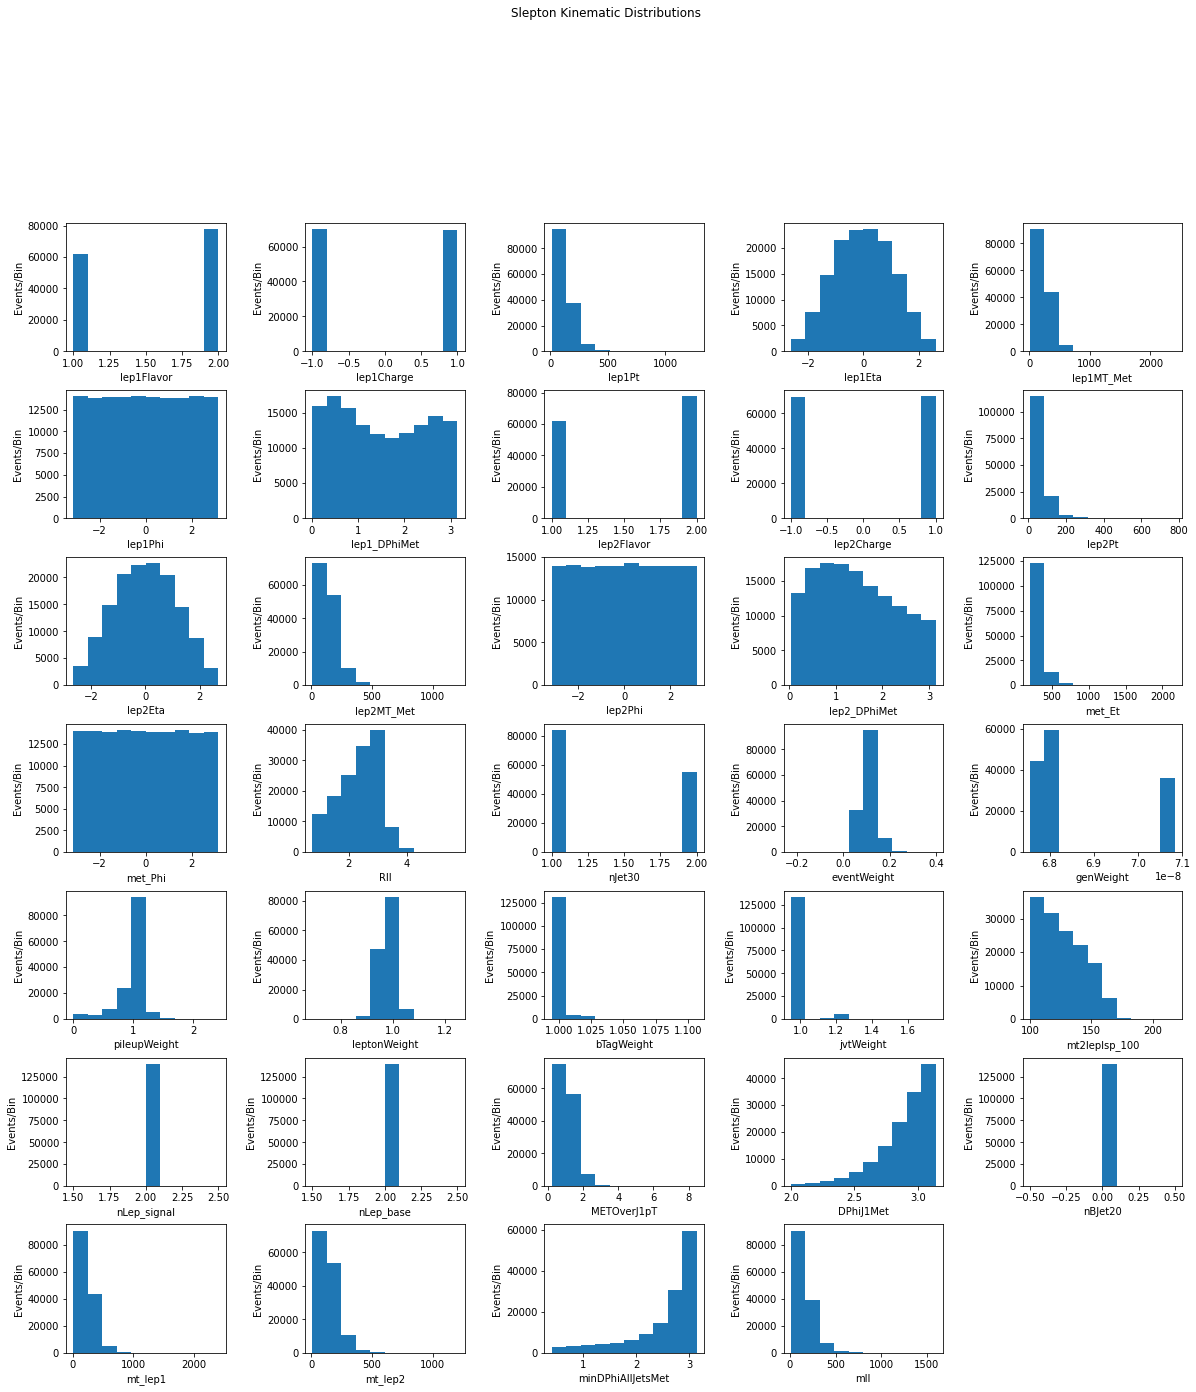

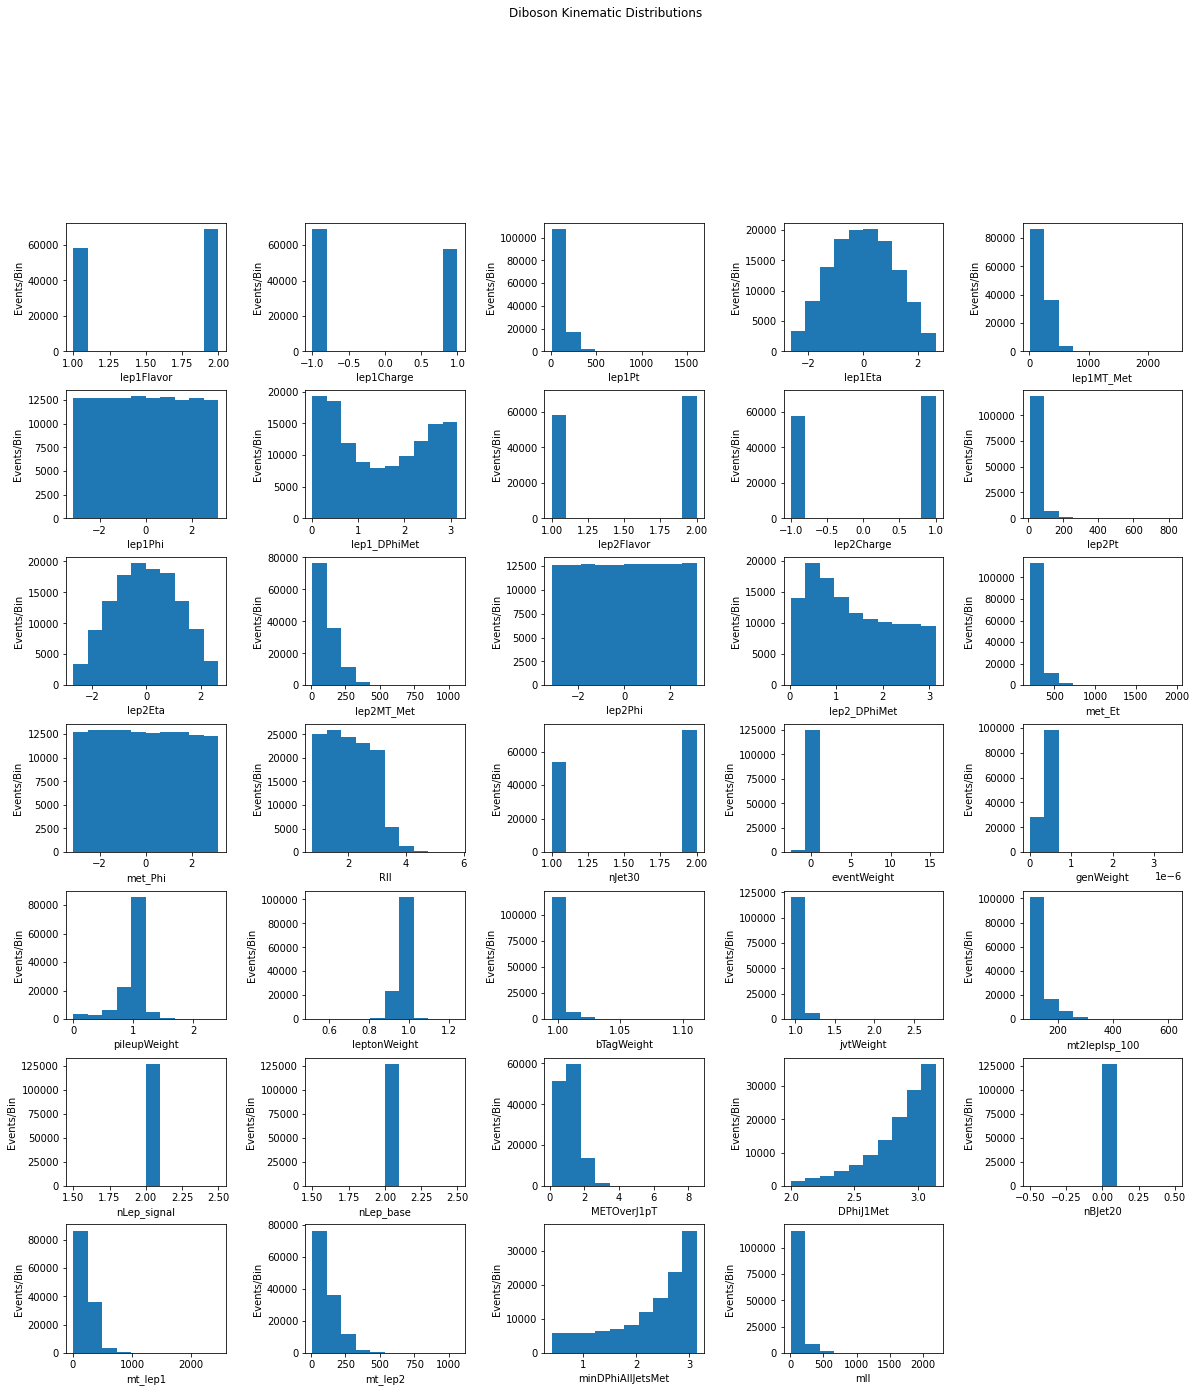

In [46]:
sig_num = len(sleptree['jvtWeight'])
bkg_num = len(dibotrees['jvtWeight'])

s = 0
fig = plt.figure(figsize=(20,30))
fig.tight_layout()
for branch in sleptree:
    ax=fig.add_subplot(10,5,1+s)
    plt.subplots_adjust(hspace=0.3,wspace=0.5)
    ax.hist(sleptree[branch])
    ax.set_xlabel(branch)
    ax.set_ylabel("Events/Bin")
    s += 1
fig.suptitle('Slepton Kinematic Distributions')
    
s = 0
fig = plt.figure(figsize=(20,30))
fig.tight_layout()
for branch in dibodf:
    ax=fig.add_subplot(10,5,1+s)
    plt.subplots_adjust(hspace=0.3,wspace=0.5)
    ax.hist(dibodf[branch])
    ax.set_xlabel(branch)
    ax.set_ylabel("Events/Bin")
    s += 1
    
fig.suptitle('Diboson Kinematic Distributions')

# Everything Everywhere All At Once

## Data Collection and Organization

In [114]:
sigline = '/home/jupyter-zdethlof/SlepWrk/SusySkimSlep_v0.2_SlepSignals.root'
sleptree = pd.DataFrame([])
lengths = []

datal = up.open(sigline)
for file in datal:
    if '2L2MET75' not in file:
        pass
    elif '200p0_140p0' in file:
        lengths.append(0)
        pass
    elif '200p0_170p0' in file:
        lengths.append(0)
        pass
    else:
        dataf = up.open(sigline)[file]
        tnums = file.split('_')
        tnums = [tnums[5],tnums[6]]
        tn1 = tnums[0].replace('p0','')
        tn2 = tnums[1].replace('p0','')
        dM = int(tn1) - int(tn2)
        if dM < 10:
            dMT = 0
        elif dM > 10 and dM < 30:
            dMT = 1
        elif dM > 30 and dM < 50:
            dMT = 2
        else:
            dMT = 3
        ps = dataf.arrays()
        lengths.append(len(ps))
        masks = masking(ps)
        select_sig = ps[masks]
        temp = Event_Organization(select_sig)
        tempdf = pd.DataFrame(temp)
        tempdf['dM'] = dMT
        sleptree = pd.concat([sleptree,tempdf], ignore_index=True)        

In [115]:
bkgline = '/home/jupyter-zdethlof/SlepWrk/SusySkimSlep_v0.2_diboson2L.root'

bkgd = up.open(bkgline)['diboson2L_NoSys;1']

pb = bkgd.arrays()

maskb = masking(pb)

select_bkg = pb[maskb]
dibotrees = Event_Organization(select_bkg)
bkg_num = len(dibotrees['jvtWeight'])
dibodf = pd.DataFrame(dibotrees)
dibodf['dM'] = -1

In [142]:
seed = random.randint(100)

slep_len = len(sleptree['jvtWeight'])
fullset = pd.concat([sleptree, dibodf[:slep_len]], ignore_index=True)
ind = np.arange(0,len(fullset))
fullset.index = ind


y = np.concatenate((np.ones(slep_len), np.zeros(slep_len)))

ycs = pd.concat([sleptree['dM'], dibodf['dM'][:slep_len]], ignore_index=True)

ls = pd.get_dummies(ycs)

ls = ls.values

X = fullset.drop(['eventWeight','genWeight','pileupWeight','leptonWeight','bTagWeight','jvtWeight','mt2leplsp_100','dM'], axis=1)
weight_arr = fullset[['eventWeight','genWeight','pileupWeight','leptonWeight','bTagWeight','jvtWeight','mt2leplsp_100',
                     'lep1Pt', 'lep1MT_Met', 'lep2Pt', 'lep2MT_Met']]

X_train, X_test, y_train, y_test, weight_train, weight_test = train_test_split(
    X, ls, weight_arr, test_size=0.2, random_state=seed+1, stratify=y
)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


shap = X_train.shape
numBranches = shap[1]
shap

(188131, 27)

## Neural Net Run

Script starting....
 [27, 27, 1]
CPU
Epoch 1/80
397/397 [==============================] - 1s 2ms/step - loss: 0.6476 - precision_6: 0.6260 - val_loss: 0.5832 - val_precision_6: 0.6889
Epoch 2/80
397/397 [==============================] - 1s 2ms/step - loss: 0.5792 - precision_6: 0.6911 - val_loss: 0.5480 - val_precision_6: 0.7168
Epoch 3/80
397/397 [==============================] - 1s 1ms/step - loss: 0.5489 - precision_6: 0.7155 - val_loss: 0.5339 - val_precision_6: 0.7072
Epoch 4/80
397/397 [==============================] - 1s 2ms/step - loss: 0.5346 - precision_6: 0.7267 - val_loss: 0.5306 - val_precision_6: 0.7125
Epoch 5/80
397/397 [==============================] - 1s 1ms/step - loss: 0.5277 - precision_6: 0.7313 - val_loss: 0.5335 - val_precision_6: 0.7095
Epoch 6/80
397/397 [==============================] - 1s 1ms/step - loss: 0.5226 - precision_6: 0.7339 - val_loss: 0.5348 - val_precision_6: 0.6960
Epoch 7/80
397/397 [==============================] - 1s 1ms/step - loss: 0

No handles with labels found to put in legend.


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 27)                756       
_________________________________________________________________
dense_25 (Dense)             (None, 27)                756       
_________________________________________________________________
dropout_12 (Dropout)         (None, 27)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 27)                756       
_________________________________________________________________
dropout_13 (Dropout)         (None, 27)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 28        
Total params: 2,296
Trainable params: 2,296
Non-trainable params: 0
____________________________________________________

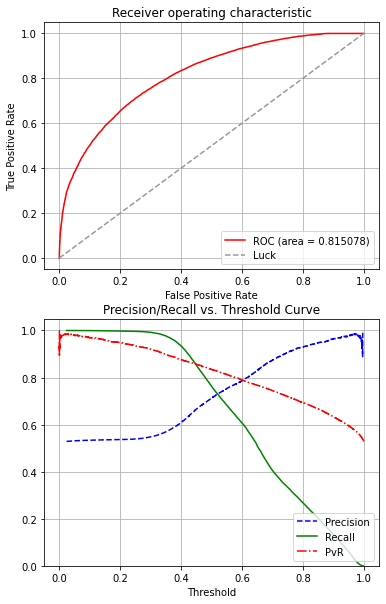

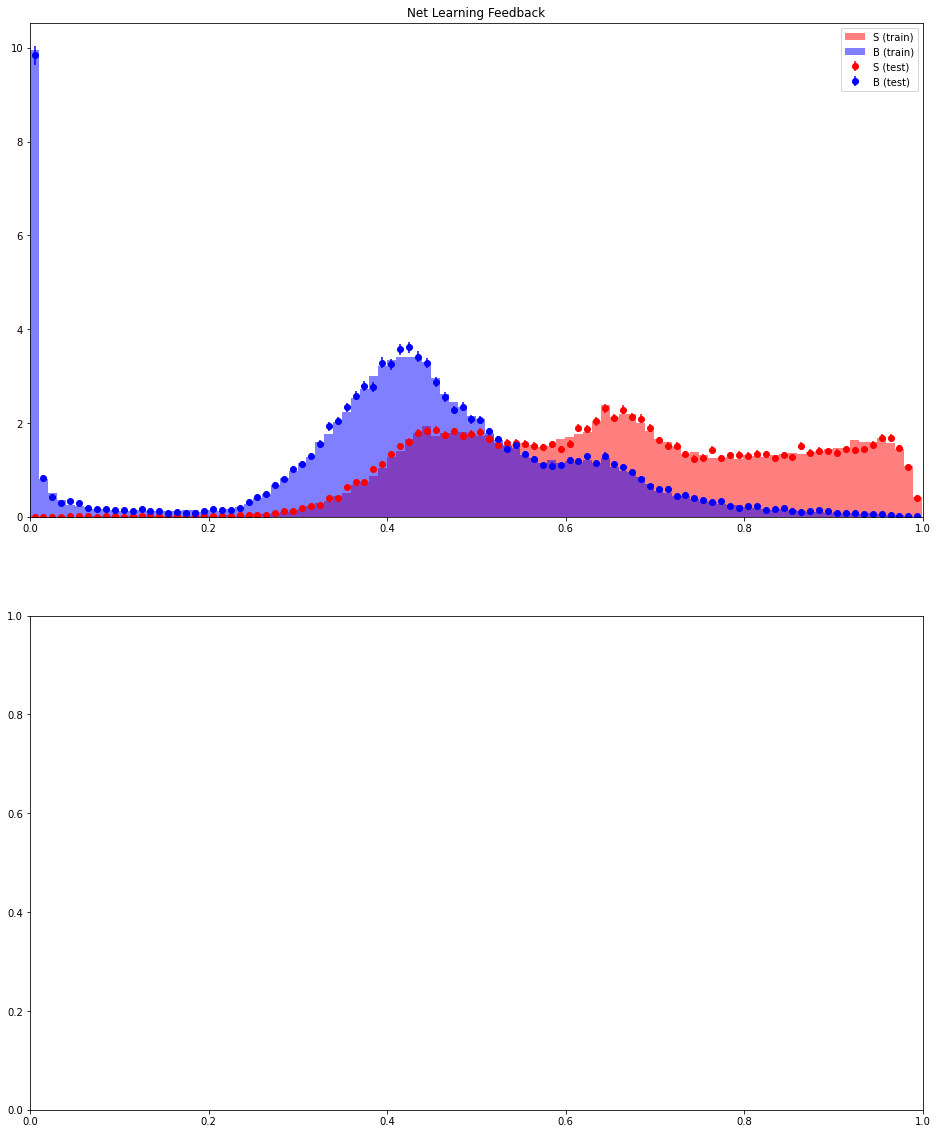

In [52]:
batch = 512

layers = 2

#model,kModel,startTime,modelName=runNN(layers,batch,0.5, X_train, y_train, X_test, y_test)
model,kModel,startTime,modelName = runNN(layers,batch,0.5, X_train, y_train, X_test, y_test,1) 

aucr = checkTraining(model,kModel)
model.summary()

Text(0.5, 0, 'probabilities')

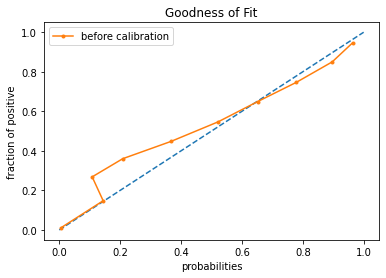

In [53]:
X_pred = model.predict(X_test)
acc, prob = calibration_curve(y_prob = X_pred, y_true = y_test, n_bins=10, normalize=True)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(acc, prob, marker='.', label='before calibration')
plt.legend(); plt.title('Goodness of Fit'); plt.ylabel('fraction of positive'); plt.xlabel('probabilities')

KeyError: 'precision_2'

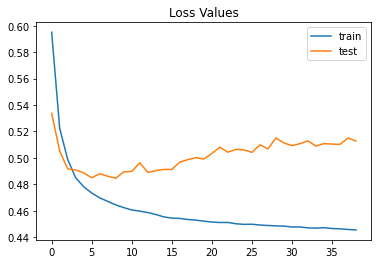

In [39]:
plt.plot(kModel.history['loss'], label='train')
plt.plot(kModel.history['val_loss'], label='test')
plt.title('Loss Values')
plt.legend()

plt.plot(kModel.history['precision_2'], label='train')
plt.plot(kModel.history['val_precision_2'], label='test')
plt.title('Accuracy Values')
plt.legend()

## Scoring of the Model Using Itself

In [54]:
weight_sig = sleptree[['eventWeight','genWeight','pileupWeight','leptonWeight','bTagWeight','jvtWeight']]
sig_df = sleptree.drop(['eventWeight','genWeight','pileupWeight','leptonWeight','bTagWeight','jvtWeight','mt2leplsp_100'],axis=1)
weight_bkg = dibodf[['eventWeight','genWeight','pileupWeight','leptonWeight','bTagWeight','jvtWeight']]
bkg_df = dibodf.drop(['eventWeight','genWeight','pileupWeight','leptonWeight','bTagWeight','jvtWeight','mt2leplsp_100'],axis=1)
histSall, predall, weightall = outputs(sig_df[:bkg_num], weight_sig[:bkg_num])
histB, predB, weightB = outputs(bkg_df, weight_bkg)
statsall = thresh_scoring(histSall, histB, predall, predB, weightall, weightB, 'All', 0, False)

All
Best Score 3.0234674565662596


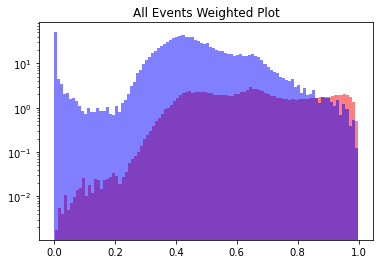

In [55]:
plt.hist(predall, weights=weightall, alpha=0.5, color='r', bins=100)
plt.hist(predB, weights = weightB, alpha=0.5, color='b', bins=100)
plt.title('All Events Weighted Plot')
plt.yscale('log')

In [22]:
allstats = pd.concat([allstats,statsall], ignore_index=True)

NameError: name 'allstats' is not defined

In [ ]:
allstats.to_csv('/home/jupyter-zdethlof/mario-mapyde/allstats.csv')

In [ ]:
statsall

## Scoring Slepton Scheme's With Pre-existing Model

In [56]:
i = 0
fas = pd.DataFrame([])
datal = up.open(sigline)

for file in datal:
    splits = file.split('_')
    if '2L2MET75' not in file:
        break
    else:
        massinf = [splits[5].replace('p0',''),splits[6].replace('p0','')]
    dataf = up.open(sigline)[file]
    ps = dataf.arrays()
    masks = masking(ps)
    select_sig = ps[masks]
    temp = Event_Organization(select_sig)
    slepdf = pd.DataFrame(temp)
    num_sig = len(slepdf['mt2leplsp_100'])
    
    X = slepdf.drop(['eventWeight','genWeight','pileupWeight','leptonWeight','bTagWeight','jvtWeight','mt2leplsp_100'], axis=1)
    weight_arr = slepdf[['eventWeight','genWeight','pileupWeight','leptonWeight','bTagWeight','jvtWeight','mt2leplsp_100',
                'lep1Pt', 'lep1MT_Met', 'lep2Pt', 'lep2MT_Met']]


    histS, predS, weightS = outputs(X, weight_arr)
    stats = thresh_scoring(histS, histB, predS, predB, weightS, weightB, massinf,i,False)
    i += 1
    fas = pd.concat([fas, stats])


['100', '25']
Best Score 3.9587741063059063
['100', '40']
Best Score 2.5933206784847465
['100', '50']
Best Score 2.612939601292854
['100', '60']
Best Score 2.4580606972180767
['100', '70']
Best Score 1.7167262177357947
['100', '80']
Best Score 1.2395251566735852
['125', '105']
Best Score 0.8801520918815483
['125', '50']
Best Score 4.685187072489863
['125', '65']
Best Score 3.7053241718055627
['125', '75']
Best Score 2.784850873591323
['125', '85']
Best Score 2.0667100572185952
['125', '95']
Best Score 1.5117099845517505
['150', '100']
Best Score 3.1914768976494727
['150', '110']
Best Score 2.1170359717325025
['150', '120']
Best Score 1.6617159769085574
['150', '130']
Best Score 0.7963498316902858
['150', '75']
Best Score 4.626913293259514
['150', '90']
Best Score 3.2602724624441843
['175', '100']
Best Score 4.530718629516766
['175', '115']
Best Score 2.9271355507008265
['175', '125']
Best Score 2.646773042240613
['175', '135']
Best Score 1.854817919309701
['175', '145']
Best Score 1.12

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [57]:
ind = np.arange(0,len(fas['Slepton Mass']))
fas.index = ind
#del fas['Signal Lengths']
#fas.insert(9,'Signal Lengths',lengths)
fas

,Slepton Mass,DM Mass,Signal Sum,Background Sum,Significance,Signal Sum 0.94,Background Sum 0.94,Significance 0.94,Thresh Score
0,100,25,21.050711,7.802599,3.958774,15.047420,5.309369,3.712249,92
1,100,40,14.055175,9.505895,2.593321,8.508609,5.309369,2.370155,91
2,100,50,10.849361,6.425360,2.612940,7.776708,5.309369,2.201460,93
3,100,60,11.462306,7.802599,2.458061,7.509255,5.309369,2.138650,92
4,100,70,6.546788,6.425360,1.716726,5.145334,5.309369,1.552724,93
5,100,80,4.507082,6.425360,1.239525,3.765004,5.309369,1.180437,93
6,125,105,3.521827,7.802599,0.880152,2.227249,5.309369,0.732370,92
7,125,50,16.823157,3.773979,4.685187,19.536106,5.309369,4.507648,95
8,125,65,12.236375,3.773979,3.705324,14.863239,5.309369,3.677760,95
9,125,75,13.377432,7.802599,2.784851,8.873939,5.309369,2.452692,92


In [58]:
fas.to_csv('/home/jupyter-zdethlof/mario-mapyde/out.csv')

In [59]:
sm = fas['Slepton Mass'].tolist()
ms = []
for mass1, mass2 in zip(fas['Slepton Mass'],fas['DM Mass']):
    ms.append(int(mass1.replace('p0',''))- int(mass2.replace('p0','')))
    
signifs = fas['Significance'].tolist()


Text(0.5, 1.0, '217 Model Contour')

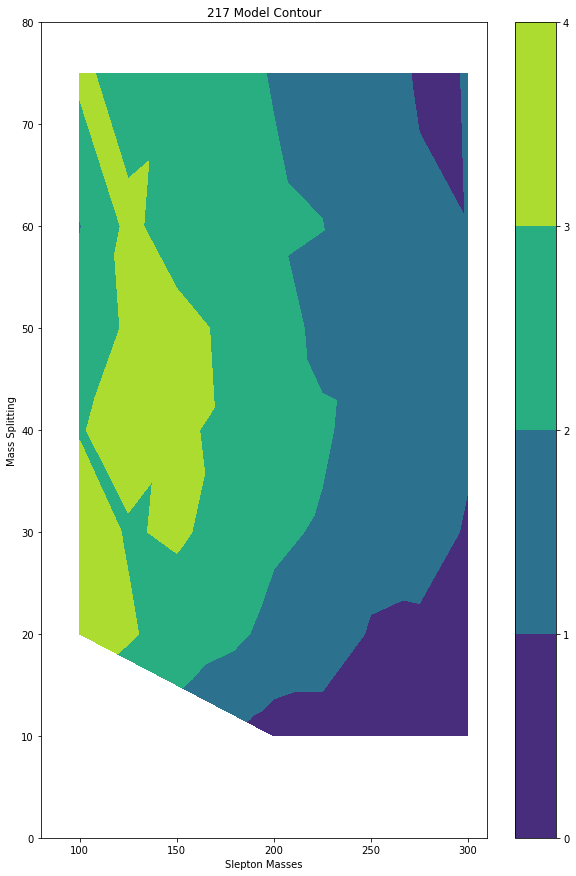

In [127]:
fig = plt.figure(figsize=(10,15))

trian = tri.Triangulation(sm, ms)
info170 = plt.tricontourf(trian, signifs, levels=[0,1,2,3,4])
plt.colorbar()
plt.ylim(0,80)
plt.xlim(80,310)
plt.ylabel('Mass Splitting')
plt.xlabel('Slepton Masses')
plt.title('217 Model Contour')

Text(0.5, 1.0, '217 @ 0.94 Model Contour')

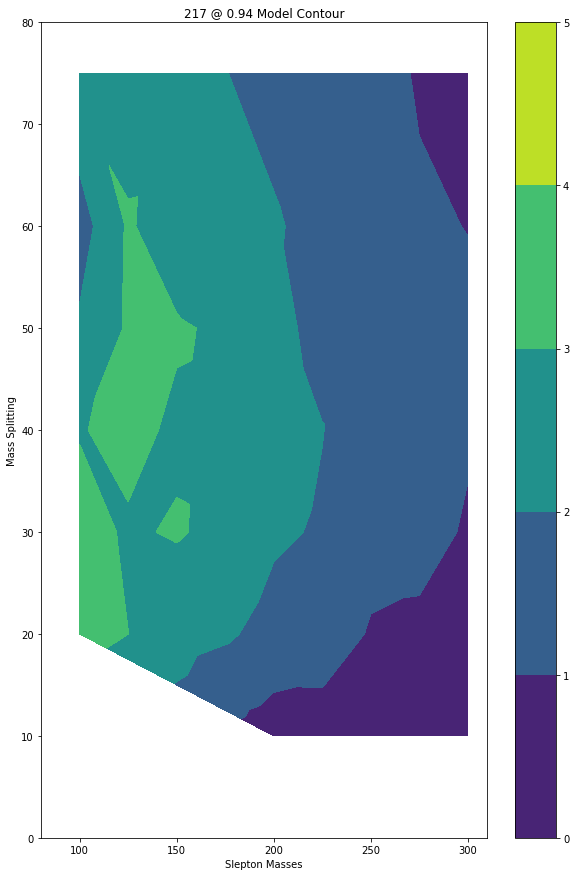

In [128]:
prime_sig = fas['Significance 0.94']
fig = plt.figure(figsize=(10,15))
trian = tri.Triangulation(sm, ms)
plt.tricontourf(trian, prime_sig, levels=[0,1,2,3,4,5])
plt.colorbar()
plt.ylim(0,80)
plt.xlim(80,310)
plt.ylabel('Mass Splitting')
plt.xlabel('Slepton Masses')
plt.title('217 @ 0.94 Model Contour')

Text(0.5, 1.0, 'Multi Model Contour (Capped)')

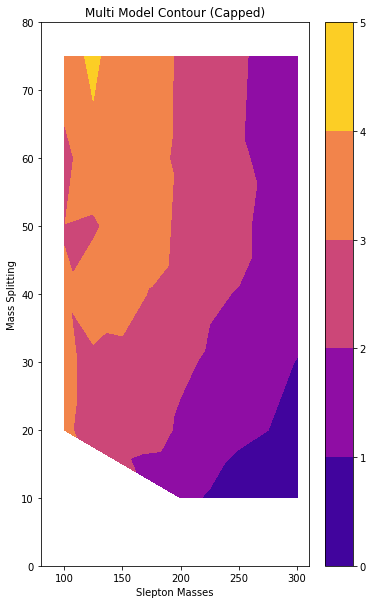

In [232]:
fig = plt.figure(figsize=(6,10))
trian = tri.Triangulation(sm, ms)
cs = plt.tricontourf(trian, signifs, levels=[0,1,2,3,4,5], cmap='plasma')
plt.colorbar()
plt.ylim(0,80)
plt.xlim(80,310)
plt.ylabel('Mass Splitting')
plt.xlabel('Slepton Masses')
plt.title('Multi Model Contour (Capped)')

Text(0.5, 1.0, 'Multi Model @ 0.94 Contour (Capped)')

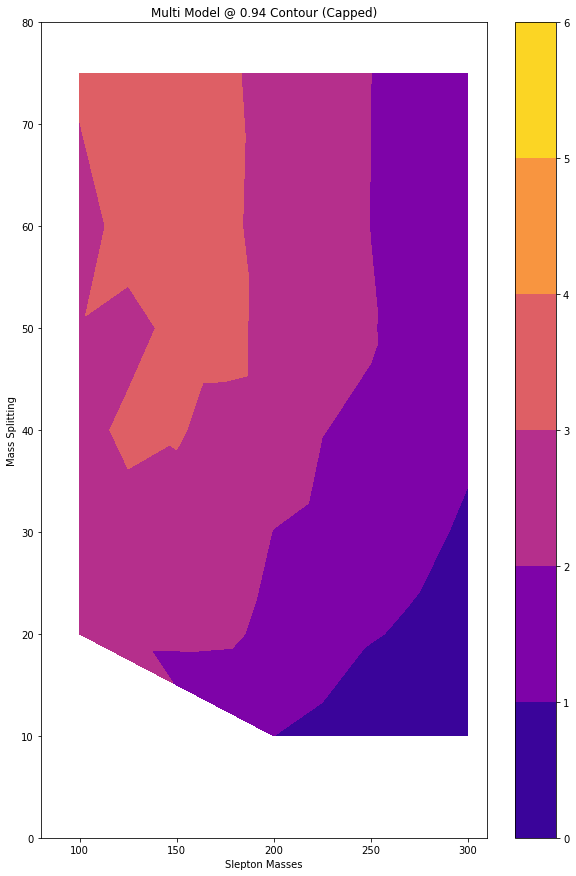

In [230]:
hi_sig = fas['Significance 0.94'].tolist()
fig = plt.figure(figsize=(10,15))
trian = tri.Triangulation(sm, ms)
cs1 = plt.tricontourf(trian, hi_sig, levels=[0,1,2,3,4,5,6,], cmap='plasma')
plt.colorbar()
plt.ylim(0,80)
plt.xlim(80,310)
plt.ylabel('Mass Splitting')
plt.xlabel('Slepton Masses')
plt.title('Multi Model @ 0.94 Contour (Capped)')

Text(0.5, 1.0, '214 Model Contour (Capped)')

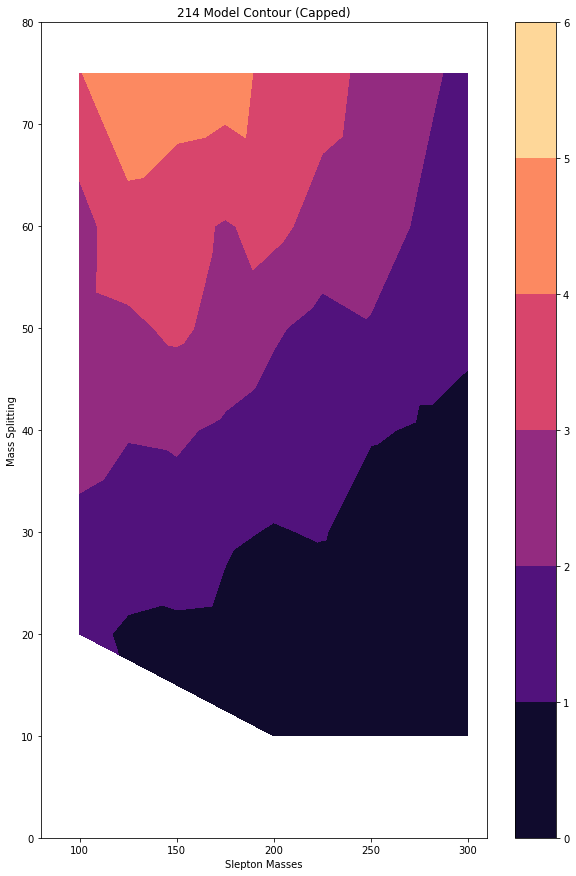

In [60]:
fig = plt.figure(figsize=(10,15))
trian = tri.Triangulation(sm, ms)
info140 = plt.tricontourf(trian, signifs, levels=[0,1,2,3,4,5,6], cmap='magma')
plt.colorbar()
plt.ylim(0,80)
plt.xlim(80,310)
plt.ylabel('Mass Splitting')
plt.xlabel('Slepton Masses')
plt.title('214 Model Contour (Capped)')

Text(0.5, 1.0, '214 Model @ 0.94 Contour (Capped)')

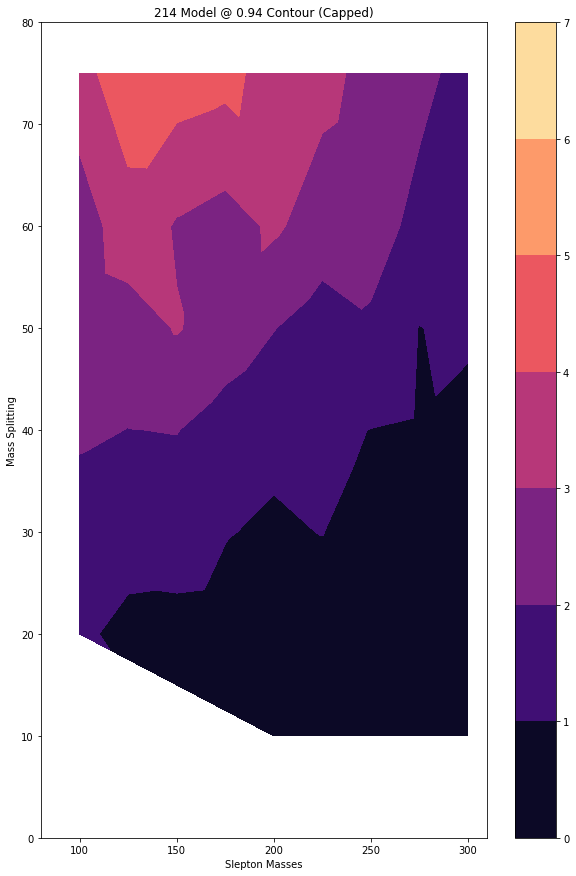

In [61]:
hi_sig = fas['Significance 0.94'].tolist()
fig = plt.figure(figsize=(10,15))
trian = tri.Triangulation(sm, ms)
plt.tricontourf(trian, hi_sig, levels=[0,1,2,3,4,5,6,7], cmap='magma')
plt.colorbar()
plt.ylim(0,80)
plt.xlim(80,310)
plt.ylabel('Mass Splitting')
plt.xlabel('Slepton Masses')
plt.title('214 Model @ 0.94 Contour (Capped)')

Text(0.5, 1.0, '214 & 217 Model Contour (Capped)')

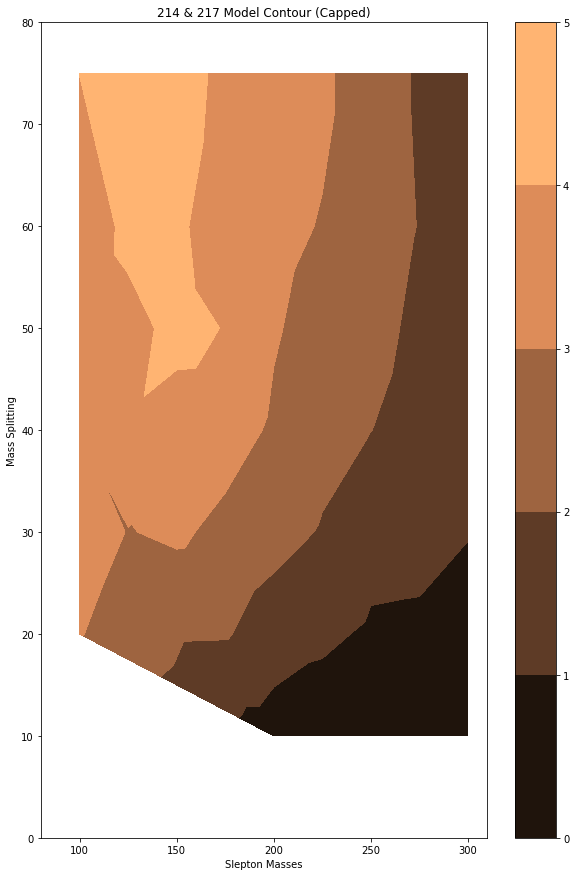

In [250]:
fig = plt.figure(figsize=(10,15))
trian = tri.Triangulation(sm, ms)
info = plt.tricontourf(trian, signifs, levels=[0,1,2,3,4,5], cmap='copper')
plt.colorbar()
plt.ylim(0,80)
plt.xlim(80,310)
plt.ylabel('Mass Splitting')
plt.xlabel('Slepton Masses')
plt.title('214 & 217 Model Contour (Capped)')

Text(0.5, 1.0, '214 & 217 Model @ 0.94 Contour (Capped)')

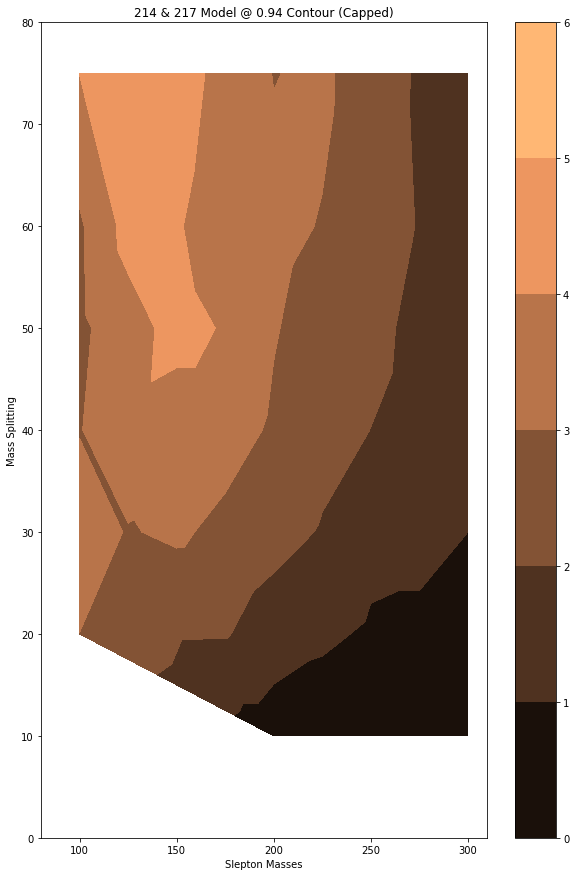

In [251]:
hi_sig = fas['Significance 0.94'].tolist()
fig = plt.figure(figsize=(10,15))
trian = tri.Triangulation(sm, ms)
plt.tricontourf(trian, hi_sig, levels=[0,1,2,3,4,5,6], cmap='copper')
plt.colorbar()
plt.ylim(0,80)
plt.xlim(80,310)
plt.ylabel('Mass Splitting')
plt.xlabel('Slepton Masses')
plt.title('214 & 217 Model @ 0.94 Contour (Capped)')

In [270]:
arrays = []
for collection in info140.collections:
    for path in collection.get_paths():
        v = path.to_polygons()
        for verts in v:
            poly = np.array(verts, dtype=np.int32)
            arrays.append(poly)


In [275]:
two = arrays[2]
three = arrays[3]
four = arrays[4]
five = arrays[5]

datadic = {'2x':[],'2y':[],'3x':[],'3y':[],'4x':[],'4y':[],'5x':[],'5y':[]
          }

for verts in two:
    datadic['2x'].append(verts[0])
    datadic['2y'].append(verts[1])

for verts in three:
    datadic['3x'].append(verts[0])
    datadic['3y'].append(verts[1])
    
for verts in four:
    datadic['4x'].append(verts[0])
    datadic['4y'].append(verts[1])

for verts in five:
    datadic['5x'].append(verts[0])
    datadic['5y'].append(verts[1])
    
lens = []
for val in datadic:
    lens.append(len(datadic[val]))
    
for vals in datadic:
    valen = len(datadic[vals])
    over = max(lens) - valen
    if over == 0:
        pass
    datadic[vals].extend(np.nan for val in np.arange(over))

outdata = pd.DataFrame(datadic) 

In [276]:
outdata.to_csv('/home/jupyter-zdethlof/SlepWrk/existing_limits/NN_exclusion_214.csv')
print('Done!')

Done!


In [159]:
temp = pd.read_csv('existing_limits/NN_exclusion_217.csv')

In [160]:
temp

,Unnamed: 0,2x,2y,3x,3y,4x,4y
0,0,152,14,119.0,18.0,100.0,72.0
1,1,158,15,128.0,19.0,120.0,60.0
2,2,164,17,130.0,20.0,117.0,57.0
3,3,179,18,125.0,26.0,120.0,50.0
4,4,187,20,122.0,28.0,107.0,43.0
...,...,...,...,...,...,...,...
56,56,125,26,NaN,NaN,NaN,NaN
57,57,130,20,NaN,NaN,NaN,NaN
58,58,128,19,NaN,NaN,NaN,NaN
59,59,119,18,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '217 Model Contour')

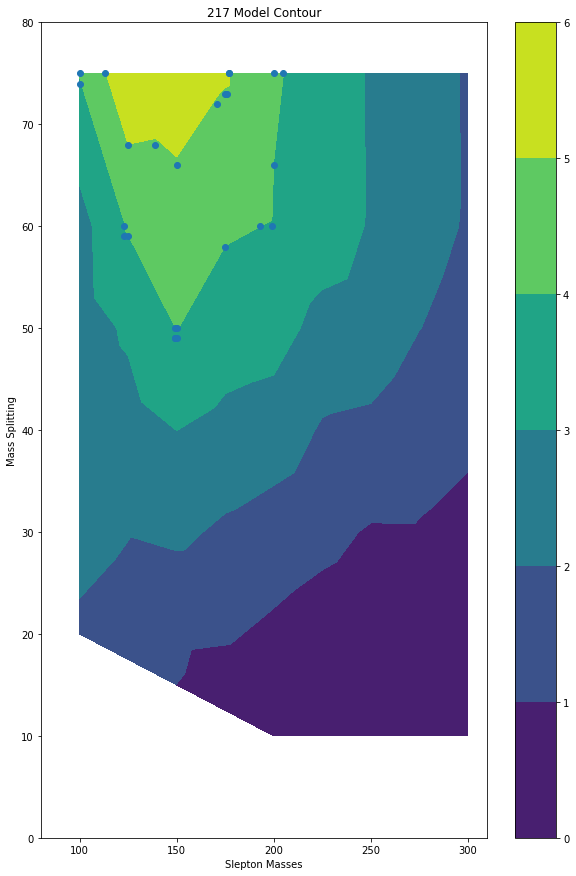

In [274]:
fig = plt.figure(figsize=(10,15))

info170 = plt.tricontourf(trian, signifs, levels=[0,1,2,3,4,5,6])

plt.colorbar()

plt.scatter(datadic['5x'],datadic['5y'])
plt.ylim(0,80)
plt.xlim(80,310)
plt.ylabel('Mass Splitting')
plt.xlabel('Slepton Masses')
plt.title('217 Model Contour')

In [35]:
i = 0
for i in range(0,2):
    print(i)

0
1


In [133]:
#required library which holes the iris dataset
from sklearn.datasets import load_iris
#load the iris dataset
iris = load_iris()
#our inputs will contain 4 features
X = iris.data[:, 0:4]
#the labels are the following
y = iris.target
#print the distinct y labels
print(np.unique(y))

[0 1 2]


In [144]:
NN = build_classification(27,ycs)
NN.fit(X_train,y_train,epochs=80,batch_size=512)

Epoch 1/80
368/368 [==============================] - 0s 817us/step - loss: 1.0918 - precision_19: 0.6607
Epoch 2/80
368/368 [==============================] - 0s 813us/step - loss: 1.0117 - precision_19: 0.6860
Epoch 3/80
368/368 [==============================] - 0s 819us/step - loss: 0.9923 - precision_19: 0.6902
Epoch 4/80
368/368 [==============================] - 0s 810us/step - loss: 0.9800 - precision_19: 0.6939
Epoch 5/80
368/368 [==============================] - 0s 801us/step - loss: 0.9713 - precision_19: 0.6964
Epoch 6/80
368/368 [==============================] - 0s 789us/step - loss: 0.9651 - precision_19: 0.6971
Epoch 7/80
368/368 [==============================] - 0s 800us/step - loss: 0.9604 - precision_19: 0.6978
Epoch 8/80
368/368 [==============================] - 0s 806us/step - loss: 0.9567 - precision_19: 0.6981
Epoch 9/80
368/368 [==============================] - 0s 804us/step - loss: 0.9538 - precision_19: 0.6978
Epoch 10/80
368/368 [=========================

In [140]:
ls = pd.get_dummies(ycs)
ls.values

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)